## Exercise 08.1

Consider the function 

$$
f(x) = e^{x/10} \sin(\omega_{1}x)\cos(\omega_{0}x)
$$

from $x = -4\pi$ to $x = 4\pi$.  

1. Plot the function when $\omega_{0} = \omega_{1} = 1$. Label the axes.
1. Create an interactive plot with sliders for $\omega_{0}$ and $\omega_{1}$, varying from 0 to 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib

In [3]:
matplotlib.rcParams.update({'font.size': 12, 'figure.figsize': (10, 7) })

In [4]:
x = np.linspace(-4*np.pi, 4*np.pi, num=1000)

In [5]:
y = np.exp(x/10) * np.sin(x) * np.cos(x)

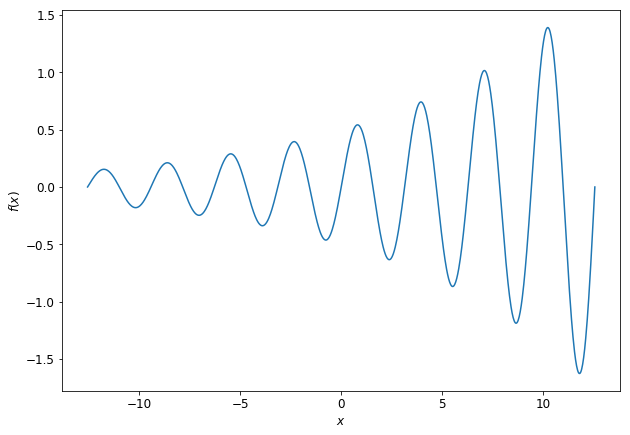

In [6]:
plt.plot(x, y);
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

In [7]:
import ipywidgets
from ipywidgets import interact

In [8]:
def plot(w0 = 1, w1 = 1):
    x = np.linspace(-4*np.pi, 4*np.pi, 1000)
    y = np.exp(x/10) * np.sin(w1 * x) * np.cos(w0 * x)
    plt.plot(x, y)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('$\omega_1$ = {}, $\omega_0$ = {}'.format(w1, w0))

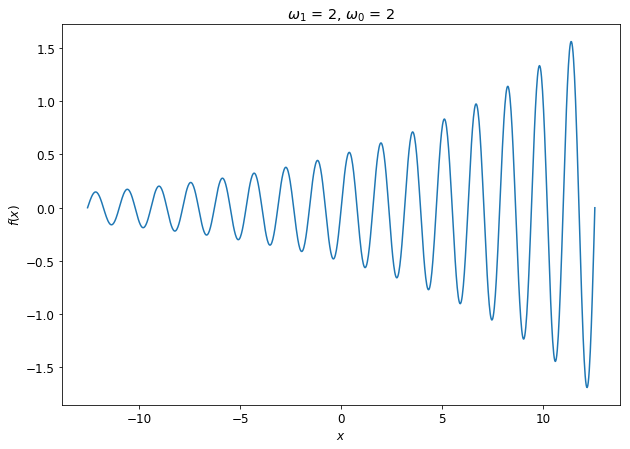

In [9]:
interact(plot, w1 = 1, w0 = 1);

## Exercise 08.2

1. Plot the function

$$
f(x) = \frac{sin(x)}{x}
$$

    from $x = -6\pi$ to $x = 6\pi$. Think carefully about which $x$ values you use when $x$ is close to zero.

2. Add to the above plot the graph of $1/|x|$, and limit the range of the $y$ axis to 1 using `plt.ylim`. (Hint: use `np.abs(x)` to return the absolute values of each component of a NumPy array `x`.

In [10]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 100)

In [11]:
y = np.sin(x) / x

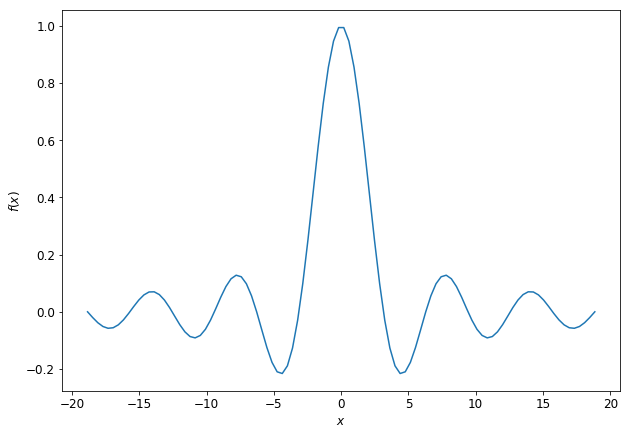

In [12]:
plt.plot(x, y)
plt.ylabel('$f(x)$')
plt.xlabel('$x$');

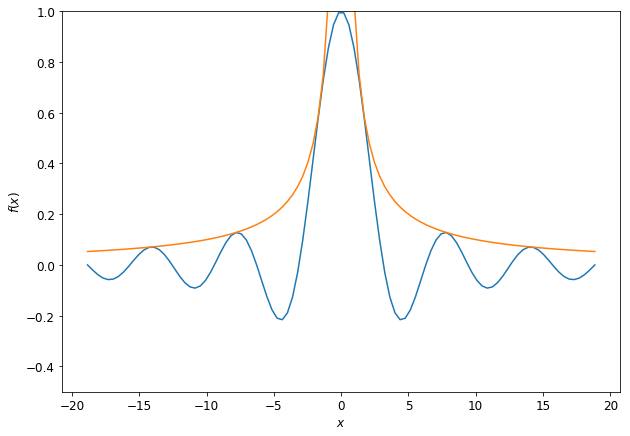

In [51]:
plt.plot(x, y)
plt.ylabel('$f(x)$')
plt.xlabel('$x$');
plt.plot(x, 1/abs(x))
plt.ylim((-0.5, 1.0));

## Exercise 08.3 (demographics and interactive plotting)

A county planning body has requested an interactive tool to visualise the population distribution in Cambridgeshire (by district) from 2011 to 2021 for different population growth rate scenarios in each district. It can be assumed that:

- the growth rates are constant in each district;
- the growth rate will not be negative in any district; and 
- the annual growth rate in any one district will not exceed 10%.

Building on the pie chart example with population data in the body of the notebook, create an interactive plot with:

1. A slider for the year (from 2011 to 2021); and
2. Sliders for the annual population growth for each district (in percentage), with an 
   initial value of zero for each district.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets
from ipywidgets import interact
import numpy as np

In [2]:
matplotlib.rcParams.update({'font.size': 12, 'figure.figsize': (10, 7) })

Solution from video:

In [52]:
population = (123900, 83800, 95300, 169500, 148800)
disctrict = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population_data = [x for x in zip(district, population)]

In [53]:
population_data

[('Cambridge City', 123900),
 ('East Cambridgeshire', 83800),
 ('Fenland', 95300),
 ('Huntingdonshire', 169500),
 ('South Cambridgeshire', 148800)]

In [55]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

In [57]:
explode = (0.1, 0.0, 0, 0, 0)

In [58]:
def pie_chart(year=2011, CambridgeCity=0.0, EastCambridgeshire=0.0, 
              Fenland=0.0, Huntingdonshire=0.0, SouthCambridgeshire=0.0):
    num_years = year - 2011
    
    # Build list of growth rates from input data
    growth_rates = [ CambridgeCity, EastCambridgeshire, 
              Fenland, Huntingdonshire, SouthCambridgeshire]
    
    # Create empty population list
    population_list = [0] * len(population)
    
    # Compute population in each region after given number of years for given growth rate
    for i in range(len(population)):
        population_list[i] = population[i] * (1.0 + growth_rates[i]/100.0)**num_years
        
    plt.pie(population_list, explode=explode, labels=disctrict, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

In [59]:
growth_range = (0.0, 10.0)

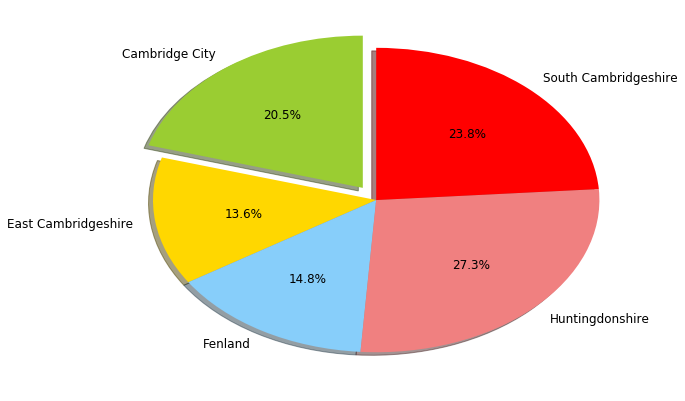

In [60]:
interact(pie_chart, 
         year=(2011, 2021),
         CambridgeCity=growth_range,
         EastCambridgeshire=growth_range,
         Fenland=growth_range,
         Huntingdonshire=growth_range,
         SouthCambridgeshire=growth_range);

## Exercise 08.4



### Background

Your task is to produce a crime report data plot in the neighborhood of your college, by reported crime
category. It will be interesting to see how this varies between colleges!

We can get crime data in the UK from the police data systems using what is known as a REST API,
and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
(an entry is a Python dictionary detailing the report).

The first step is the import the modules we will be using:

In [67]:
import json
import requests

The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is

    https://data.police.uk/api/crimes-street/all-crime?poly=[LAT0],[LON0]:[LAT1],[LON1]:[LAT2,LON2]&date=YYYY-MM
    
This return crimes reports in the triangle given by the three geographic coordinate points `(latitude0, longitude0), (latitude1, longitude1) and (latitude2, longitude2)`, for the month `YYY-MM`.          

Below we create this URL string to include a large part of the Cambridge city centre. You can modify this for your own college or other area of interest (Google Maps is a handy way to get the geographic coordinates).

In [70]:
# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'

# year-month of interest
year_month = '2016-05'

# Construct request URL string using the above data
url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + year_month

# Fetch data from https://data.police.uk
r = requests.get(url)

In [71]:
r.status_code == requests.codes.ok

True

In [72]:
crime_data = r.json()

In [73]:
import pprint
if crime_data:
    pprint.pprint(crime_data[0])

{'category': 'anti-social-behaviour',
 'context': '',
 'id': 48727639,
 'location': {'latitude': '52.203952',
              'longitude': '0.118261',
              'street': {'id': 560741, 'name': "On or near Bene't Street"}},
 'location_subtype': '',
 'location_type': 'Force',
 'month': '2016-05',
 'outcome_status': None,
 'persistent_id': ''}


## Task

Produce a bar chart of the number of reports in different categories. The categories are:

In [96]:
categories = ('anti-social-behaviour', 'bicycle-theft', 'burglary', 'criminal-damage-arson', \
              'drugs', 'other-crime', 'other-theft', 'public-order', 'shoplifting', \
              'theft-from-the-person', 'vehicle-crime', 'violent-crime')

Run your program for different parts of Cambridge, starting with the area around your college, and for different months and years.

#### Hints:

Create an empty dictionary, which will eventually map the report category to the number of incidents:

In [78]:
categories_freq = {}

Iterate over all reports in the list, and extract the category string from each report. If the category string (the 'key') is already in teh dictionary, increment the associated counter. Otherwise, add the key to the dictionary, and associate the value 1.

```
# Iterate over all reports
for report in crime_data:
    # Get category type from the report
    category = report['category']
    
    if category in categories_freq:
        # Increment counter here
        pass  # This can be removed once this 'if' block has a body
    else:
        # Add category to dictionary here
        pass  # This can be removed once this 'else' block has a body
    
```

In [97]:
for report in crime_data:
    category = report['category']
    if category in categories_freq:
        categories_freq[category] += 1
    else:
        categories_freq[category] = 1

In [98]:
categories_freq

{'anti-social-behaviour': 192,
 'bicycle-theft': 166,
 'burglary': 24,
 'criminal-damage-arson': 26,
 'drugs': 34,
 'other-crime': 4,
 'other-theft': 70,
 'possession-of-weapons': 8,
 'public-order': 26,
 'robbery': 4,
 'shoplifting': 94,
 'theft-from-the-person': 44,
 'vehicle-crime': 6,
 'violent-crime': 104}

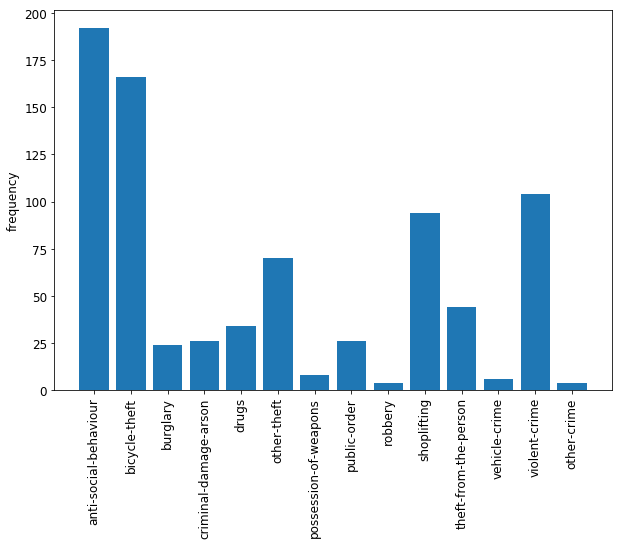

In [104]:
x = np.arange(len(categories_freq))
plt.bar(x, categories_freq.values())
plt.xticks(x, categories_freq.keys(), rotation='vertical')
plt.ylabel('frequency');

### Extensions (optional)

1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.

In [105]:
crime_data[:3]

[{'category': 'anti-social-behaviour',
  'context': '',
  'id': 48727639,
  'location': {'latitude': '52.203952',
   'longitude': '0.118261',
   'street': {'id': 560741, 'name': "On or near Bene't Street"}},
  'location_subtype': '',
  'location_type': 'Force',
  'month': '2016-05',
  'outcome_status': None,
  'persistent_id': ''},
 {'category': 'anti-social-behaviour',
  'context': '',
  'id': 48724240,
  'location': {'latitude': '52.201418',
   'longitude': '0.125165',
   'street': {'id': 560042,
    'name': 'On or near Further/higher Educational Building'}},
  'location_subtype': '',
  'location_type': 'Force',
  'month': '2016-05',
  'outcome_status': None,
  'persistent_id': ''},
 {'category': 'anti-social-behaviour',
  'context': '',
  'id': 48723349,
  'location': {'latitude': '52.204510',
   'longitude': '0.123776',
   'street': {'id': 560736, 'name': 'On or near Emmanuel Street'}},
  'location_subtype': '',
  'location_type': 'Force',
  'month': '2016-05',
  'outcome_status': 